In [65]:
#initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Data Preparation

Read crypto_data.csv into Pandas

In [66]:
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


Discard all cryptocurrencies that are not being traded.

In other words, filter for currencies that are currently being traded.

Once you have done this, drop the IsTrading column from the dataframe

In [67]:
df = df.loc[df["IsTrading"] != False]
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [68]:
# Remove the IsTrading Column
df = df.drop(columns=["IsTrading"])
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


Remove all rows that have at least one null value

In [69]:
# Remove all rows with `null` values if any.
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values.")

Column Unnamed: 0 has 0 null values.
Column CoinName has 0 null values.
Column Algorithm has 0 null values.
Column ProofType has 0 null values.
Column TotalCoinsMined has 459 null values.
Column TotalCoinSupply has 0 null values.


In [70]:
df = df.dropna(axis=0, how='any')
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [71]:
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values.")

Column Unnamed: 0 has 0 null values.
Column CoinName has 0 null values.
Column Algorithm has 0 null values.
Column ProofType has 0 null values.
Column TotalCoinsMined has 0 null values.
Column TotalCoinSupply has 0 null values.


Filter for cryptocurrencies that have been mined. 

That is, the total coins mined should be greater than zero.

In [72]:
df = df[df['TotalCoinsMined'] != 0]
print(df)

     Unnamed: 0     CoinName    Algorithm ProofType  TotalCoinsMined  \
0            42      42 Coin       Scrypt   PoW/PoS     4.199995e+01   
2           404      404Coin       Scrypt   PoW/PoS     1.055185e+09   
5          1337    EliteCoin          X13   PoW/PoS     2.927942e+10   
7           BTC      Bitcoin      SHA-256       PoW     1.792718e+07   
8           ETH     Ethereum       Ethash       PoW     1.076842e+08   
...         ...          ...          ...       ...              ...   
1238       ZEPH       ZEPHYR      SHA-256      DPoS     2.000000e+09   
1242        GAP      Gapcoin       Scrypt   PoW/PoS     1.493105e+07   
1245        BDX       Beldex  CryptoNight       PoW     9.802226e+08   
1246        ZEN      Horizen     Equihash       PoW     7.296538e+06   
1247        XBC  BitcoinPlus       Scrypt       PoS     1.283270e+05   

     TotalCoinSupply  
0                 42  
2          532000000  
5       314159265359  
7           21000000  
8                  0

In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 

Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

In [73]:
df = df.drop(columns=["CoinName"])
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [74]:
# Well nothing was said about the unnamed column, its got non-numeric info in it, but hasn't been told to  be dropped. 
#So its going to be the index

df_crypto = df.set_index('Unnamed: 0')
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data.

To accomplish this task, use Pandas to create dummy variables. 

Examine the number of rows and columns of your dataset now. How did they change?

In [75]:
X = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
X.head()

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)

In [77]:
# Fitting model
model.fit(df_crypto)

ValueError: could not convert string to float: 'Scrypt'

In [61]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataframe_crypto)
    inertia.append(km.inertia_)

ValueError: could not convert string to float: 'Scrypt'

In [ ]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

In [27]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

## Dimensionality Reduction

Creating dummy variables above dramatically increased the number of features in your dataset. 

Perform dimensionality reduction with PCA.

In [41]:
# It went to 100, so 5 is a 20th
pca = PCA(n_components=3)
coin_pca = pca.fit_transform(X_scaled)

In [43]:
# Transform PCA data to a DataFrame
df_coin_pca = pd.DataFrame(
    data=coin_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_coin_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.343948,0.968816,-0.581211
1,-0.327295,0.969097,-0.581907
2,2.320279,1.633373,-0.728728
3,-0.134774,-1.317945,0.185417
4,-0.135412,-2.000384,0.423427


Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. 

For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3.
    
For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

In [44]:
# Fetch the explained variance
a = pca.explained_variance_ratio_
round(sum(a), 3)

0.068

Next, further reduce the dataset dimensions with t-SNE and visually inspect the results.

In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. 


In [46]:
df_t_SNE = pd.read_csv(file_path)

In [47]:
df_t_SNE.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
759,SOCC,SocialCoin,Scrypt,True,PoW,5.167775e+06,75000000
937,POA,Poa Network,Proof-of-Authority,True,PoA,2.044790e+08,252460800
889,ITZ,Interzone,C11,True,PoW,1.191659e+07,23000000
439,EXB,ExaByte (EXB),SHA-256,True,PoW,NaN,500000000
597,CQST,ConquestCoin,X13,True,PoW/PoS,NaN,30000000
137,MZC,MazaCoin,SHA-256,True,PoW/PoS,1.613836e+09,2419200000
435,XPOKE,PokeChain,X13,True,PoS,NaN,75000000
1023,POSQ,Poseidon Quark,Quark,True,PoS,2.716265e+06,650000000
815,BLHC,BlackholeCoin,Scrypt,True,PoW/PoS,1.636254e+07,14788275.991
496,OLYMP,OlympCoin,X11,True,PoW/PoS,NaN,50000000


In [48]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [49]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_t_SNE)

ValueError: could not convert string to float: 'BTC'

Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

## Cluster Analysis with k-Means

Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10.

In [ ]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)

In [ ]:
TotalCoinsMined

Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


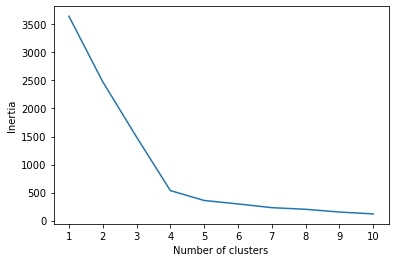

In [81]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_coin_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [82]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

,k,inertia
0,1,3645.641389
1,2,2476.772789
2,3,1490.787012
3,4,534.812999
4,5,358.616633
5,6,296.747251
6,7,230.494808
7,8,201.267104
8,9,152.415621
9,10,118.806167


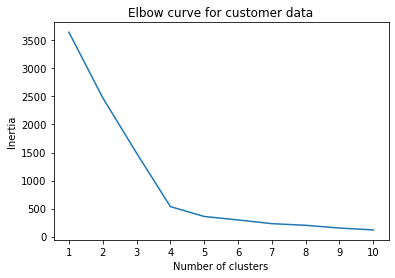

In [83]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [84]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [87]:
clusters = get_clusters(4, df_coin_pca)

In [88]:
clusters

,principal component 1,principal component 2,principal component 3,class
0,-0.343948,0.968816,-0.581211,0
1,-0.327295,0.969097,-0.581907,0
2,2.320279,1.633373,-0.728728,0
3,-0.134774,-1.317945,0.185417,3
4,-0.135412,-2.000384,0.423427,3
...,...,...,...,...
528,2.497394,0.694283,-0.177892,0
529,-0.341994,0.968715,-0.581245,0
530,0.324931,-2.266401,0.501323,3
531,-0.136735,-2.095246,0.475982,3


In [92]:
def show_clusters(df_coin_pca):
    plt.scatter(df['principal component 2'], df['principal component 3'], c=df['class'])
    plt.xlabel('principal component 2')
    plt.ylabel('principal component 3')
    plt.show()

## Recommendation

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. 

Can the cryptocurrencies be clustered together? 

If so, into how many clusters?